In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data procesing and cleaning

In [2]:
data=pd.read_csv("pangan.csv")
data.head()

,id,no,kode_wilayah_kemendagri,kode_wilayah_bps,kabupaten,komoditas,kebutuhan,ketersediaan,neraca,satuan,minggu_ke,bulan,tahun,status
0,1,1,32.18,3218,PANGANDARAN,BERAS,803.42,1154.28057,350.8605697,TON,1,JANUARI,2022,SURPLUS
1,2,2,32.18,3218,PANGANDARAN,JAGUNG,0.37,7.855,7.485,TON,1,JANUARI,2022,SURPLUS
2,3,3,32.18,3218,PANGANDARAN,BAWANG MERAH,23.36,7.995,-15.365,TON,1,JANUARI,2022,DEFISIT
3,4,4,32.18,3218,PANGANDARAN,BAWANG PUTIH,9.73,3.755,-5.975,TON,1,JANUARI,2022,DEFISIT
4,5,5,32.18,3218,PANGANDARAN,CABAI BESAR,2.28,17.205,14.925,TON,1,JANUARI,2022,SURPLUS


In [3]:
data=data.drop(['id', 'no', 'kode_wilayah_kemendagri', 'kode_wilayah_bps','kabupaten', 'satuan'], axis=1)

In [4]:
data.head()

,komoditas,kebutuhan,ketersediaan,neraca,minggu_ke,bulan,tahun,status
0,BERAS,803.42,1154.28057,350.8605697,1,JANUARI,2022,SURPLUS
1,JAGUNG,0.37,7.855,7.485,1,JANUARI,2022,SURPLUS
2,BAWANG MERAH,23.36,7.995,-15.365,1,JANUARI,2022,DEFISIT
3,BAWANG PUTIH,9.73,3.755,-5.975,1,JANUARI,2022,DEFISIT
4,CABAI BESAR,2.28,17.205,14.925,1,JANUARI,2022,SURPLUS


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   komoditas     1100 non-null   object 
 1   kebutuhan     1100 non-null   float64
 2   ketersediaan  1100 non-null   object 
 3   neraca        1100 non-null   object 
 4   minggu_ke     1100 non-null   int64  
 5   bulan         1100 non-null   object 
 6   tahun         1100 non-null   int64  
 7   status        1100 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 68.9+ KB


In [6]:
data.describe()

,kebutuhan,minggu_ke,tahun
count,1100.000000,1100.00000,1100.000000
mean,98.195436,2.71000,2022.480000
std,225.523910,1.28351,0.499827
min,0.360000,1.00000,2022.000000
25%,3.843759,2.00000,2022.000000
50%,21.472081,3.00000,2022.000000
75%,58.013962,4.00000,2023.000000
max,810.176971,5.00000,2023.000000


In [7]:
data.shape

(1100, 8)

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

komoditas       0
kebutuhan       0
ketersediaan    0
neraca          0
minggu_ke       0
bulan           0
tahun           0
status          0
dtype: int64

Exploratory data analysis

In [10]:
data['komoditas'].unique()

array(['BERAS', 'JAGUNG', 'BAWANG MERAH', 'BAWANG PUTIH', 'CABAI BESAR',
       'CABAI RAWIT', 'DAGING SAPI/KERBAU', 'DAGING AYAM RAS',
       'TELUR AYAM RAS', 'GULA PASIR', 'MINYAK GORENG'], dtype=object)

In [11]:
data['status'].value_counts()

status
SURPLUS    933
DEFISIT    167
Name: count, dtype: int64

komoditas
BAWANG MERAH       49
MINYAK GORENG      36
CABAI RAWIT        31
BAWANG PUTIH       26
GULA PASIR         12
DAGING AYAM RAS     8
TELUR AYAM RAS      5
Name: count, dtype: int64
[49, 36, 31, 26, 12, 8, 5]


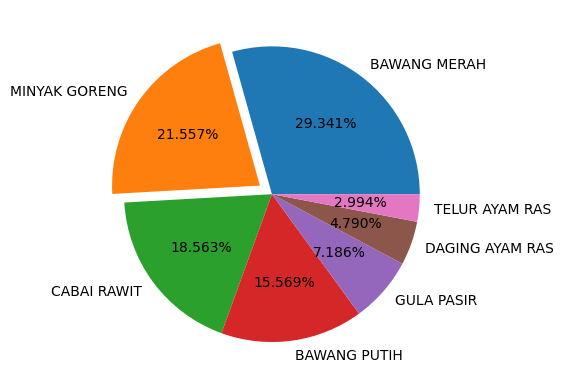

In [12]:
new_data=data[data['status']=='DEFISIT']
print(new_data['komoditas'].value_counts())
komoditas_data=list(new_data['komoditas'].value_counts())
print(komoditas_data)
plt.pie(komoditas_data, labels=['BAWANG MERAH', 'MINYAK GORENG', 'CABAI RAWIT', 'BAWANG PUTIH', 'GULA PASIR', 'DAGING AYAM RAS', 'TELUR AYAM RAS'], autopct='%.3f%%', explode=[0, 0.1, 0, 0, 0, 0, 0])


plt.show()

minggu_ke
1    39
2    39
3    39
4    32
5    18
Name: count, dtype: int64
[39, 39, 39, 32, 18]


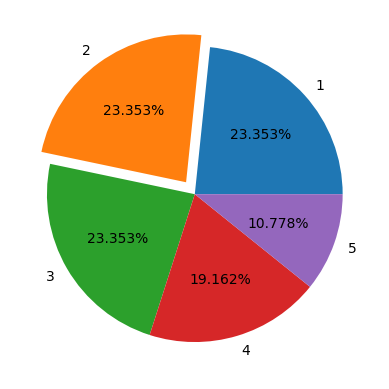

In [13]:
new_data=data[data['status']=='DEFISIT']
print(new_data['minggu_ke'].value_counts())
minggu_ke_data=list(new_data['minggu_ke'].value_counts())
print(minggu_ke_data)
plt.pie(minggu_ke_data, labels=[1,2,3,4,5], autopct='%.3f%%', explode=[0, 0.1, 0, 0, 0])


plt.show()

bulan
JANUARI      35
MARET        35
FEBRUARI     20
MEI          18
JUNI         13
JULI         12
AGUSTUS      11
APRIL         9
NOVEMBER      6
OKTOBER       4
SEPTEMBER     3
DESEMBER      1
Name: count, dtype: int64
[35, 35, 20, 18, 13, 12, 11, 9, 6, 4, 3, 1]


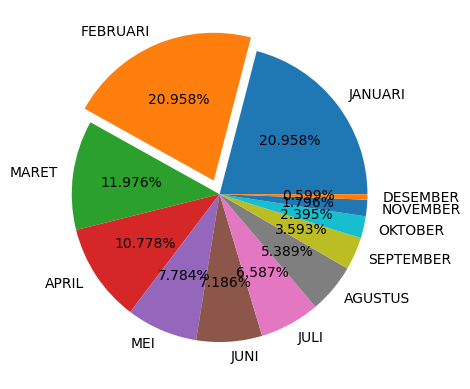

In [14]:
new_data=data[data['status']=='DEFISIT']
print(new_data['bulan'].value_counts())
bulan_data=list(new_data['bulan'].value_counts())
print(bulan_data)
plt.pie(bulan_data, labels=['JANUARI', 'FEBRUARI', 'MARET', 'APRIL', 'MEI', 'JUNI', 'JULI',
       'AGUSTUS', 'SEPTEMBER', 'OKTOBER', 'NOVEMBER', 'DESEMBER'], autopct='%.3f%%', explode=[0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


plt.show()

tahun
2022    138
2023     29
Name: count, dtype: int64
[138, 29]


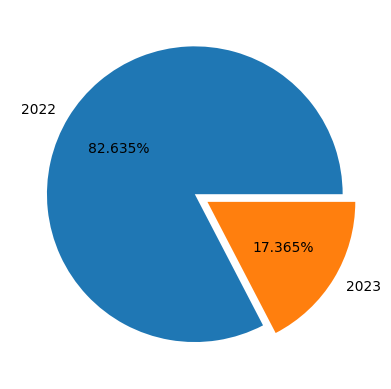

In [15]:
new_data=data[data['status']=='DEFISIT']
print(new_data['tahun'].value_counts())
tahun_data=list(new_data['tahun'].value_counts())
print(tahun_data)
plt.pie(tahun_data, labels=[2022,2023], autopct='%.3f%%', explode=[0, 0.1])


plt.show()

Text(0.5, 1.0, 'Varian Kebutuhan')

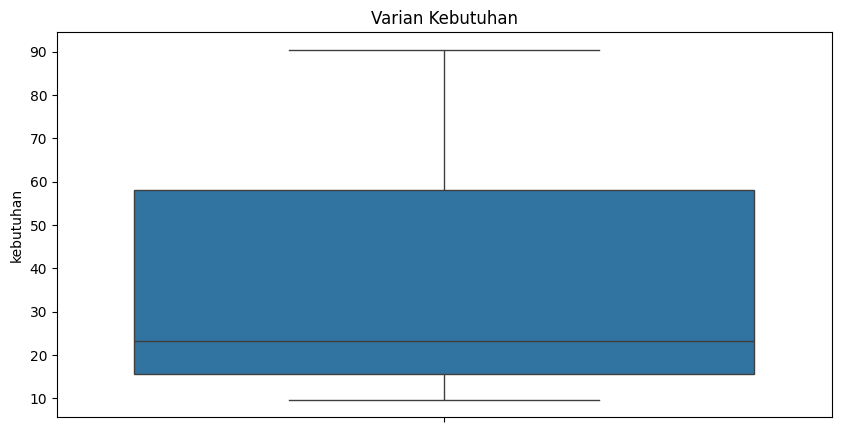

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(new_data['kebutuhan'])
plt.title("Varian Kebutuhan")

Text(0.5, 1.0, 'Varian Ketersediaan')

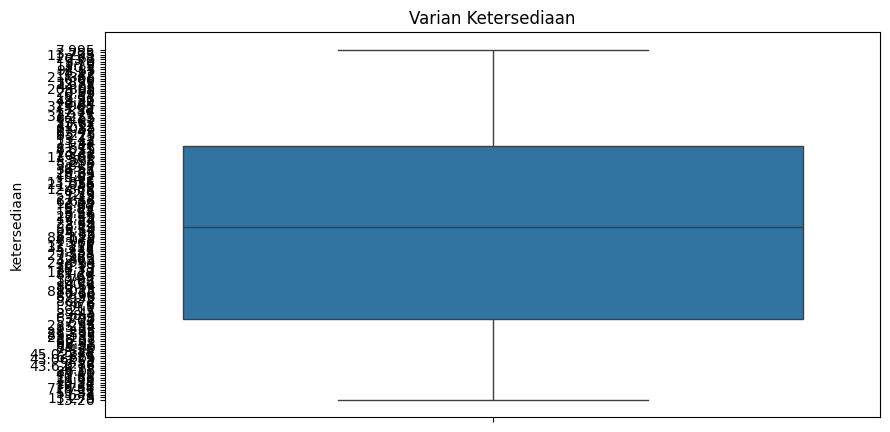

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(new_data['ketersediaan'])
plt.title("Varian Ketersediaan")

Text(0.5, 1.0, 'Varian Neraca')

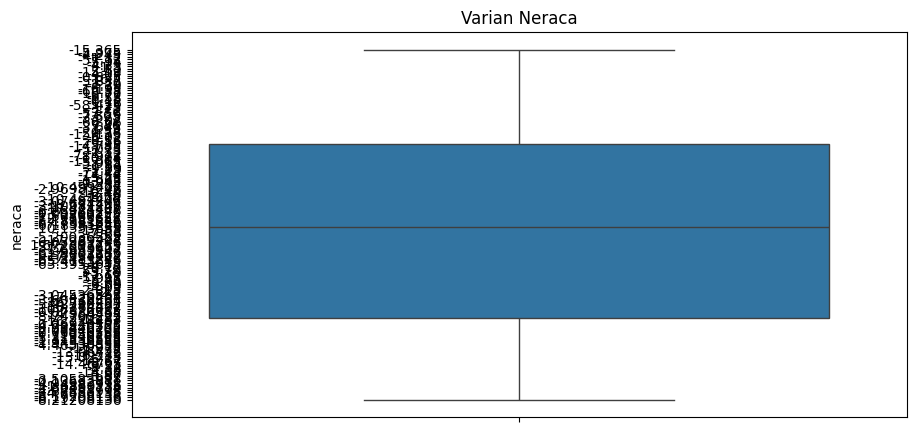

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(new_data['neraca'])
plt.title("Varian Neraca")

In [19]:
d_list = data.select_dtypes(include=['object']).columns.tolist()

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in d_list:
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [21]:
from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan target
X = data.drop('status', axis=1)
y = data['status']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

#inisialisasi SMOTE
smote = SMOTE(random_state=42)

#oversampling menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

#cek jumlah sampel setelah oversampling
print("jumlah sampel sebelum oversampling:", len(X))
print("jumlah sampel sesudah oversampling:", len(X_resampled))

#balikkan ke dalam dataframe
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['status'])], axis=1)
resampled_data.to_csv('pangan_oversampled.csv', index=False)

jumlah sampel sebelum oversampling: 1100
jumlah sampel sesudah oversampling: 1866


In [22]:
data=pd.read_csv('pangan_oversampled.csv')

In [23]:
data['status'].value_counts()

status
1    933
0    933
Name: count, dtype: int64

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
pred2=model.predict(X_test)

0.9818181818181818


Text(0.5, 1.0, 'Confusion Matrix For Random Forest')

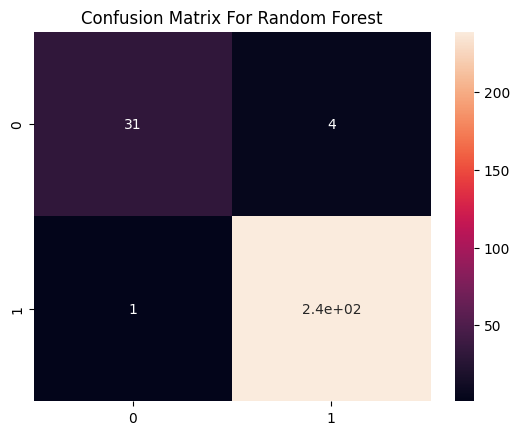

In [25]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,pred2)
sns.heatmap(cn,annot=True)
plt.title("Confusion Matrix For Random Forest")

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        35
           1       0.98      1.00      0.99       240

    accuracy                           0.98       275
   macro avg       0.98      0.94      0.96       275
weighted avg       0.98      0.98      0.98       275



In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {
    'n_estimators': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 5),
    'min_samples_leaf': np.arange(1, 5),
    'min_samples_split': np.arange(2, 5),
    'max_features': ['sqrt', 'log2', None],  # Update max_features values
    'random_state': [10]
}

rf_model=RandomForestClassifier()

rf_hyper_model=GridSearchCV(rf_model,param_grid=params)

rf_hyper_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [10]})

In [28]:
rf_hyper_model.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 9,
 'random_state': 10}

In [29]:
rf_hyper_model.score(X_test,y_test)

0.9854545454545455

In [30]:
import pickle

In [31]:
pickle.dump(model, open('pangan.pkl', 'wb'))